### Imports

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
import datetime
from sklearn.neighbors import KNeighborsClassifier

### Methods

In [186]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
        
def maxDiff(A, B):
    mx = np.max(A-B)
    mn = np.min(A-B)
    return max(abs(mn), abs(mx))

In [187]:
columns = [
"Class (Species)",
"Specimen Number",
"Eccentricity",
"Aspect Ratio",
"Elongation",
"Solidity",
"Stochastic Convexity",
"Isoperimetric Factor",
"Maximal Indentation Depth",
"Lobedness",
"Average Intensity",
"Average Contrast",
"Smoothness",
"Third moment",
"Uniformity",
"Entropy"]

In [188]:
leaf_df=pd.read_csv("leaf.csv", names = columns).drop("Specimen Number", axis=1)
y=leaf_df.iloc[:,0:1]
X=leaf_df.iloc[:,1:]

-------------------------------------------------------------------------------------------------------------------------------
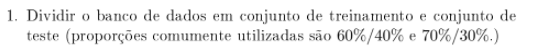

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101) 

------------------------------------------------------------------------------------------------------------------------------
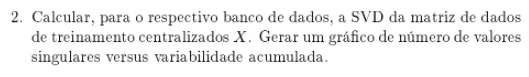

In [190]:
cent_train_X=X_train-X_train.mean()
cent_train_X

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
232,0.088529,-0.798079,-0.106232,0.09211,0.061071,0.293739,-0.033751,-0.544884,-0.024933,-0.036746,-0.010341,-0.003745,-0.000275,-0.203147
83,-0.162371,-1.179679,-0.204492,0.03656,0.059321,0.075809,-0.020682,-0.490504,-0.009941,-0.002704,-0.003158,-0.001142,0.000013,-0.245317
210,0.119589,-0.819979,-0.021052,0.02844,0.029491,0.104029,0.006683,-0.175258,0.080604,0.137046,0.046968,0.023540,0.000333,0.557813
18,0.140509,-0.498179,-0.026222,0.08869,0.061071,0.181409,-0.034674,-0.546375,-0.033368,-0.056913,-0.013562,-0.005018,-0.000262,-0.449747
200,-0.265031,-1.242279,-0.312852,0.07351,0.052301,0.279679,-0.022471,-0.501620,-0.032994,-0.053639,-0.013092,-0.004859,-0.000249,-0.527257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.279801,-1.170479,-0.127732,-0.04412,0.027741,-0.059221,0.013755,-0.049458,0.014062,0.034226,0.007011,0.002859,0.000020,0.168113
63,0.115319,-0.789279,-0.022982,-0.01133,0.054051,0.050099,-0.016496,-0.459942,-0.019182,-0.026554,-0.008417,-0.003175,-0.000246,-0.086787
326,0.184479,-0.065479,0.065578,0.09043,0.061071,0.117069,-0.030855,-0.538196,0.019414,0.031346,0.006133,0.001135,0.000430,0.216513
337,-0.357261,-1.420079,0.266048,-0.19016,-0.323139,-0.386231,0.051115,0.917152,0.044037,0.079276,0.022546,0.009877,0.000042,0.502013


In [191]:
cent_test_X=X_test-X_test.mean()
X_test

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
172,0.90557,2.3423,0.58487,0.95943,0.97368,0.55537,0.023542,0.100870,0.045897,0.134330,0.017724,0.006676,0.000245,0.99430
38,0.39289,1.1286,0.17039,0.96405,1.00000,0.79407,0.011761,0.025176,0.025409,0.078211,0.006080,0.001530,0.000158,1.03260
242,0.87202,2.1536,0.53817,0.97880,1.00000,0.65619,0.020327,0.075203,0.081306,0.187260,0.033878,0.013211,0.000361,1.46060
64,0.86486,1.7986,0.55606,0.87745,0.97018,0.52669,0.029555,0.158980,0.027883,0.092866,0.008550,0.003158,0.000121,0.99610
181,0.96652,3.8162,0.74273,0.82566,0.94737,0.32925,0.144600,3.805200,0.022715,0.101480,0.010193,0.004629,0.000045,0.52175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0.91708,2.6498,0.62919,0.98493,1.00000,0.57926,0.006805,0.008429,0.082187,0.168770,0.027693,0.008503,0.000640,1.71570
143,0.70115,1.4925,0.34048,0.98262,1.00000,0.78473,0.006151,0.006886,0.084050,0.171020,0.028418,0.008773,0.000529,1.77820
133,0.93377,2.8883,0.66665,0.93026,0.96316,0.43032,0.035710,0.232090,0.047675,0.129170,0.016412,0.005787,0.000161,1.32100
198,0.64168,1.4853,0.33620,0.95562,0.99825,0.72952,0.017439,0.055350,0.024130,0.074641,0.005540,0.001194,0.000319,0.82279


Calcular a matriz de covariancia e a decomposição espectral

In [192]:
def _cov_matrix(aT,a):
    m=a.shape[0]
    cov_matrix = np.dot(a.T, a)/(m-1)
    
    return cov_matrix

def _spectral_decomposition(cov_matrix):
    
    spectral_decomposition=np.linalg.eigh(cov_matrix)
    
    w=spectral_decomposition[0]
    Q=spectral_decomposition[1]
    
    index = np.argsort(w)[::-1]
    w=w[index]
    Q=Q[index]
    
    return w,Q

In [193]:
# begin_time = datetime.datetime.now()

# m=cent_train_X.shape[0]

# cov_matrix = np.dot(cent_train_X.T, cent_train_X)/(m-1)

# spectral_decomposition=np.linalg.eigh(cov_matrix)
# w=spectral_decomposition[0]
# Q=spectral_decomposition[1]

# index = np.argsort(w)[::-1]
# w=w[index]
# Q=Q[index]
    
# print(datetime.datetime.now() - begin_time)

In [194]:
begin_time = datetime.datetime.now()
cov_matrix = _cov_matrix(cent_train_X.T, cent_train_X)

w, Q = _spectral_decomposition(cov_matrix)
print("Time: {}".format(datetime.datetime.now() - begin_time))

Time: 0:00:00.001957


In [195]:
print("w-> {}".format(w))
print("---------------------------------------------------------------------")
print("Q-> {}".format(Q))

w-> [7.40826087e+00 1.12271399e+00 3.17609012e-01 3.65709087e-02
 2.93400385e-02 3.57421724e-03 1.80751995e-03 1.05327541e-03
 8.59481237e-04 6.56532419e-05 3.78518866e-05 4.22484658e-06
 8.48956085e-08 1.00262305e-08]
---------------------------------------------------------------------
Q-> [[-1.43616275e-03 -1.62523526e-03 -1.03944357e-02 -2.57250924e-02
   1.08016921e-03 -7.04494404e-02 -5.49658523e-02  2.91144544e-02
   1.91080151e-02 -8.86528096e-02  3.77227090e-02 -9.81723612e-01
   1.04160643e-01  7.81930578e-02]
 [-9.30490505e-01  3.57814885e-01  7.33688238e-02  2.74575216e-02
   4.01297632e-03 -1.39930976e-03 -3.61816434e-05 -6.39742221e-04
   2.35166945e-04 -1.20565793e-04  3.45746872e-04 -5.99339000e-04
   7.70329480e-05  4.16973352e-05]
 [ 2.24937740e-01  7.19737122e-01 -6.41625002e-01 -4.13593416e-02
   3.08966756e-02  1.09936533e-01  6.86415290e-02 -1.40782283e-02
   2.27973711e-03 -1.27190843e-03 -1.68358665e-04 -5.49271372e-03
   6.86094441e-04  5.13357106e-04]
 [-2.722

### Decomposição De Valor Singular (SVD)

When a is a 2D array, it is factorized as u @ np.diag(s) @ vh = (u * s) @ vh, where u and vh are 2D unitary arrays and s is a 1D array of a’s singular values. When a is higher-dimensional, SVD is applied in stacked mode as explained below.

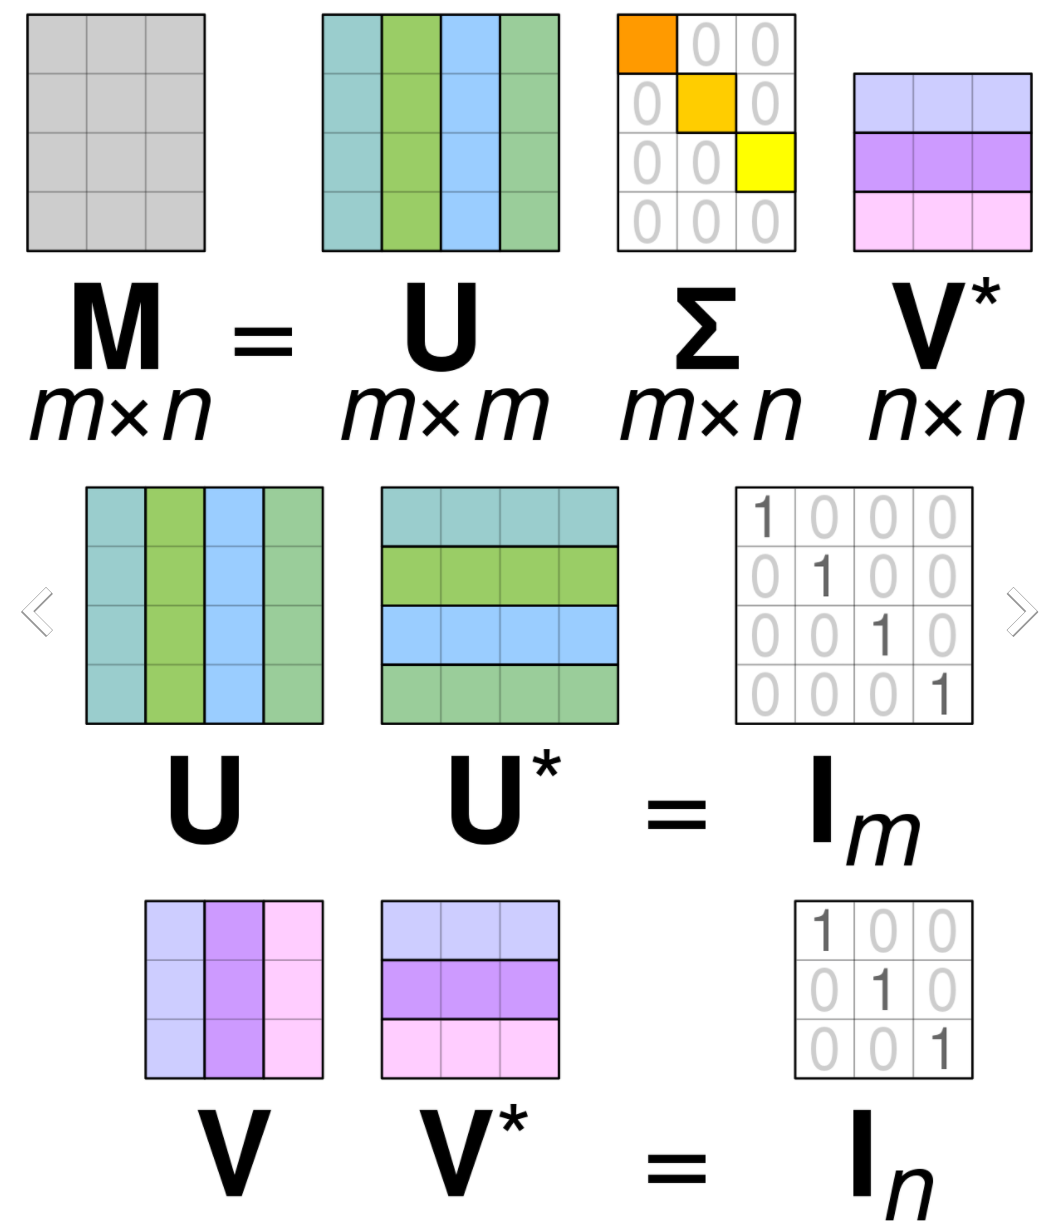

**SVD Completa**
- Não precisaria ser utilizada a completa visto que não temos MxN com m<n. Ou seja, existe mais caracteristicas do que coletas

In [196]:
begin_time = datetime.datetime.now()

U,S,Vt = np.linalg.svd(cent_train_X, full_matrices=True)
print("U.shape = {}".format(U.shape))
print("S length = {}".format(len(S)))
print("Vt.shape = {}".format(np.shape(Vt)))
print(datetime.datetime.now() - begin_time)

U.shape = (238, 238)
S length = 14
Vt.shape = (14, 14)
0:00:00.002990


**SVD Reduzida**

- X = UˆSˆV.t
    - Uˆ  ́e uma matriz m × n, com colunas ortonormais;
    - Sˆ  ́e uma matriz n × n diagonal;
    - V  ́e uma matriz n × n ortogonal.
    - As colunas ortonormais de Uˆ s ̃ao os vetores singulares
esquerdos de X;
    - Os elementos da diagonal principal de Sˆ s ̃ao os valores
singulares de X.
    - As colunas ortonormais de V s ̃ao os vetores singulares
direitos de X.

In [197]:
begin_time = datetime.datetime.now()

U,S,Vt = np.linalg.svd(cent_train_X, full_matrices=False)
print("U.shape = {}".format(U.shape))
print("S length = {}".format(len(S)))
print("Vt.shape = {}".format(np.shape(Vt)))
print(datetime.datetime.now() - begin_time)

U.shape = (238, 14)
S length = 14
Vt.shape = (14, 14)
0:00:00.001624


In [198]:
#matprint(np.dot(Vt.T, Vt))

In [199]:
#matprint(np.dot(U.T, U))

In [200]:
# matprint(np.dot(U, U.T))

In [201]:
def _variabilidade_acumulada(S,r):
    variabilidade_acumulada = (np.sum(S[0:r]**2) / np.sum(S**2))*100
    return variabilidade_acumulada

In [202]:
quant_max_features = cent_train_X.shape[1] #14
vari_acum_list = []
r_list = []

for r in range(1, quant_max_features+1):
    
    variabilidade_acumulada = _variabilidade_acumulada(S,r)
    print("variabilidade_acumulada {} com r = {}".format(variabilidade_acumulada,r))
    vari_acum_list.append(variabilidade_acumulada)
    r_list.append(r)

variabilidade_acumulada 83.03459183915494 com r = 1
variabilidade_acumulada 95.61839514185483 com r = 2
variabilidade_acumulada 99.17827716597364 com r = 3
variabilidade_acumulada 99.5881777526391 com r = 4
variabilidade_acumulada 99.91703200987445 com r = 5
variabilidade_acumulada 99.95709318955667 com r = 6
variabilidade_acumulada 99.9773525572496 com r = 7
variabilidade_acumulada 99.98915806672541 com r = 8
variabilidade_acumulada 99.99879145774419 com r = 9
variabilidade_acumulada 99.99952732412878 com r = 10
variabilidade_acumulada 99.99995158240056 com r = 11
variabilidade_acumulada 99.99999893608009 com r = 12
variabilidade_acumulada 99.99999988762221 com r = 13
variabilidade_acumulada 100.0 com r = 14


In [203]:
# quant_max_features = cent_train_X.shape[1]
# vari_acum_list = []
# r_list = []

# for r in range(1, quant_max_features+1):
#     variabilidade_acumulada = (np.sum(S[0:r]**2) / np.sum(S**2))*100
#     print("variabilidade_acumulada {} com r = {}".format(variabilidade_acumulada,r))
#     vari_acum_list.append(variabilidade_acumulada)
#     r_list.append(r)

In [204]:
fig = px.line(x=r_list, y=vari_acum_list, title='Número de valores singulares versus variabilidade acumulada')
fig.update_layout(
    xaxis_title="Número de valores singulares",
    yaxis_title="Variabilidade acumulada")

fig.show()

### Verificando com sklearn

In [205]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(cent_train_X)
variabilidade_acumulada = pca.explained_variance_ratio_.sum()*100
variabilidade_acumulada = round(variabilidade_acumulada,3)
print("Variabilidade Acumulada = {} com 5 componentes".format(variabilidade_acumulada))

Variabilidade Acumulada = 99.917 com 5 componentes


In [206]:
pca = PCA(variabilidade_acumulada/100)
principalComponents = pca.fit_transform(cent_train_X)

print("Variabilidade Acumulada de 99.917 gera {} componentes".format(principalComponents.shape[1]))

Variabilidade Acumulada de 99.917 gera 5 componentes


-------------------------------------------------------------------------------------------------------------------------------
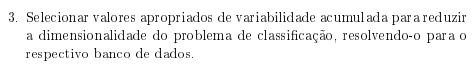

**Redução de Dimensão**

In [207]:
def red_dim(r):
    return U[:,0:r] * S[0:r], np.dot(cent_test_X, Vt[0:r,:].T)
# da os dados projetados no hiperplano de projeção r

In [208]:
r = 5
new_X_train, new_X_test = red_dim(r)

In [209]:
n_neighbor_list = []
acc_list = []

for i in range(1,20):
    
    n_neighbor_list.append(i)
    
    knn = KNeighborsClassifier(n_neighbors=i) #metric='mahalanobis'
    knn.fit(new_X_train, y_train.values.ravel())

    predictions = knn.predict(new_X_test)
    variabilidade_acumulada = _variabilidade_acumulada(S,r)
    acc=accuracy_score(y_test, predictions)
    
    acc_list.append(acc)
    
#     # neigh.score(y_train, predictions)
#     print("Com n_neighbors = {} foi obtido acurácia de {}".format(i, acc))
#     print("---------------------------------------------------------------")
    
fig = px.line(x=n_neighbor_list, y=acc_list, title='Knn usando r=5 e variabilidade acumulada=99.917')
fig.update_layout(
xaxis_title="n_neighbor",
yaxis_title="Acurácia")

fig.show()

### Testando com regressão Logistica 

In [215]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(new_X_train, y_train.values.ravel())

predictions=logisticRegr.predict(new_X_test)
accuracy_score(y_test, predictions)

0.3333333333333333

### posso testar outros modelos
https://machinelearningmastery.com/types-of-classification-in-machine-learning/

### Verificando com que U[:,0:r] * S[0:r] (x_test reduzido) é equivalentes PCA(n_components=5) de x_test  do sklearn

In [210]:
r=5
red_matrix = U[:,0:r] * S[0:r]
maxDiff(abs(principalComponents), abs(red_matrix))

1.176836406102666e-14

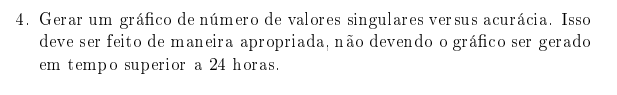

In [211]:
acc_list = []
r_list = []

for r in range(1, quant_max_features+1):
    new_X_train, new_X_test = red_dim(r)
    knn  = KNeighborsClassifier(n_neighbors=4) #Mahalanobis testar , metric='mahalanobis'
    knn.fit(new_X_train, y_train.values.ravel()) # precisa centralizar y ?

    predictions = knn.predict(new_X_test)

    acc=accuracy_score(y_test, predictions)
    acc_list.append(acc)
    r_list.append(r)

fig = px.line(x=r_list, y=acc_list, title='Número de valores singulares versus acurácia')
fig.update_layout(
    xaxis_title="Número de valores singulares",
    yaxis_title="Acurácia"
)
fig.show()

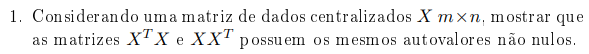

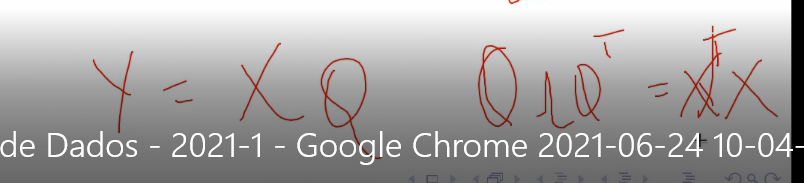

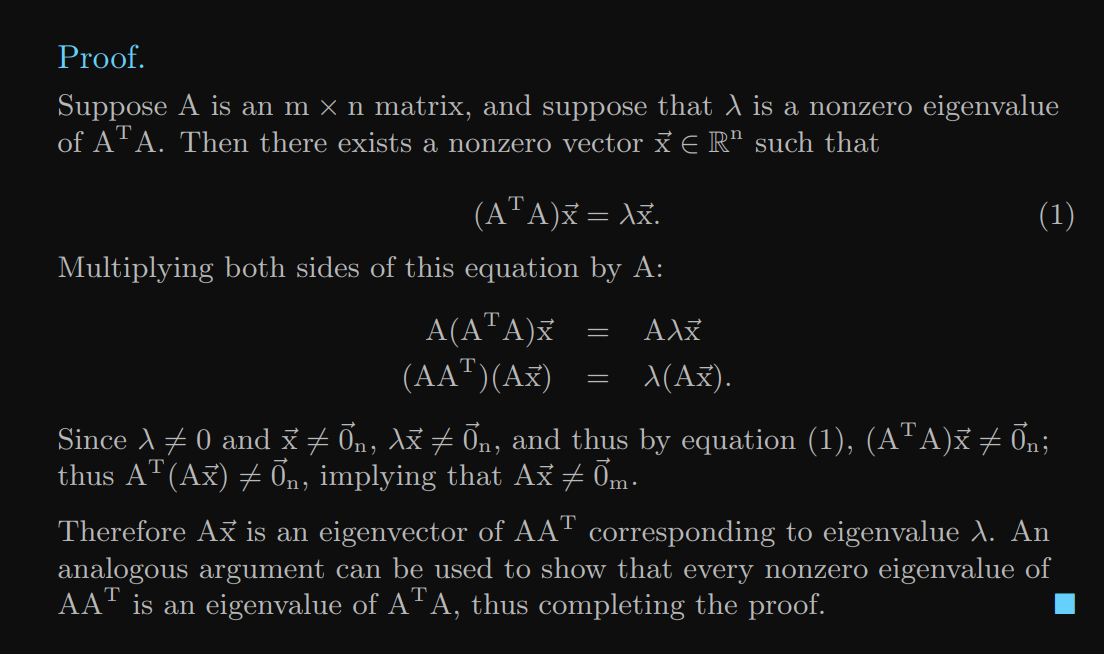

Ou usar isso aqui para n ficar igual 
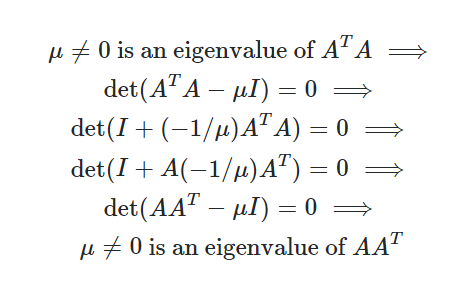
https://math.stackexchange.com/questions/1087064/non-zero-eigenvalues-of-aat-and-ata

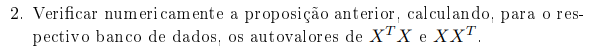

In [24]:
# m=cent_train_X.shape[0]

# cov_matrix = np.dot(cent_train_X.T, cent_train_X)/(m-1)
cov_matrix = np.dot(cent_train_X.T, cent_train_X)

spectral_decomposition=np.linalg.eigh(cov_matrix)

w1=spectral_decomposition[0]
w1[::-1].sort()
print(w1)

print("-----------------------")
cov_matrix = np.dot(cent_train_X,cent_train_X.T)

spectral_decomposition=np.linalg.eigh(cov_matrix)

w2=spectral_decomposition[0]
w2[::-1].sort()
print(w2)

[1.95189623e+03 2.98166196e+02 6.81592870e+01 9.21087775e+00
 7.60386235e+00 7.92275134e-01 3.99947473e-01 2.51619265e-01
 1.66817634e-01 1.61644305e-02 9.19532201e-03 8.30475883e-04
 1.74517609e-05 2.11142108e-06]
-----------------------
[ 1.95189623e+03  2.98166196e+02  6.81592870e+01  9.21087775e+00
  7.60386235e+00  7.92275134e-01  3.99947473e-01  2.51619265e-01
  1.66817634e-01  1.61644305e-02  9.19532201e-03  8.30475883e-04
  1.74517609e-05  2.11142108e-06  3.67517440e-13  2.41774133e-13
  1.08784935e-13  8.03432807e-14  5.15817883e-14  4.50847549e-14
  4.00184839e-14  3.76937771e-14  2.81178315e-14  2.27554148e-14
  2.19071999e-14  1.78007729e-14  1.74514269e-14  1.58681639e-14
  1.45296329e-14  1.18845741e-14  1.17076364e-14  1.12664627e-14
  9.82000115e-15  9.74037255e-15  8.68896529e-15  8.32810756e-15
  8.06847466e-15  7.29147758e-15  7.14174591e-15  6.80483805e-15
  6.51592054e-15  5.91960712e-15  5.55997403e-15  5.52503696e-15
  5.36782840e-15  5.20144776e-15  5.15163593e-

In [25]:
def adjust_to_same_len(w1, w2):
    len1 = len(w1)
    len2 = len(w2)
    
    delta = abs(len1-len2)
    
    if len1<len2:
        w1 = list(w1)
        w1.extend([0]*delta)
        w1=np.array(w1)
    else:
        w2 = list(w2)
        w2.extend([0]*delta)
        w2 = np.array(w2)
        
    return w1,w2

In [26]:
# verificar se é igual para os não nulos
print(len(w1))
print(len(w2))
print("Adjusted")
w1,w2 = adjust_to_same_len(w1, w2)
print(len(w1))
print(len(w2))


14
238
Adjusted
238
238


In [28]:
maxDiff(w1,w2)

1.1368683772161603e-12

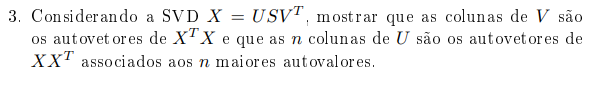

https://math.stackexchange.com/questions/1087064/non-zero-eigenvalues-of-aat-and-ata

In [29]:
# como assim atenção ao sentido dos vetores ??
# eu preciso provar alguma coisa da parte "e que as n colunas de U são os autovetores de XXT associados aos n maiores autovalores

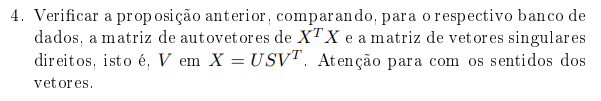

In [30]:
U,S,Vt = np.linalg.svd(cent_train_X, full_matrices=False)
# print("U.shape = {}".format(U.shape))
# print("S length = {}".format(len(S)))
# print("Vt.shape = {}".format(np.shape(Vt)))


cov_matrix = np.dot(cent_train_X.T, cent_train_X)
spectral_decomposition=np.linalg.eigh(cov_matrix)
w=spectral_decomposition[0]
w[::-1].sort()
Q=spectral_decomposition[1]
Q=np.fliplr(Q)

1- Mostrar que as colunas de V são os autovetores de XTX

In [31]:
maxDiff(Vt.T, Q)

1.9563132437556785

In [32]:
maxDiff(abs(Vt.T), abs(Q))

2.44804176929847e-13

In [33]:
maxDiff(Vt, Q) # achei o erro alto

1.2728803521122125

In [34]:
maxDiff(abs(Vt), abs(Q)) # eu acho que ignora o sentido, dessa forma

0.9830143817130436

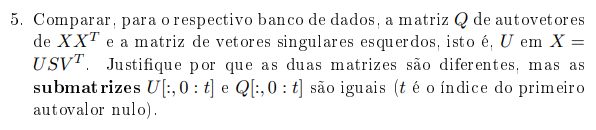

In [38]:
cov_matrix = np.dot(cent_train_X, cent_train_X.T)
spectral_decomposition=np.linalg.eigh(cov_matrix)
w=spectral_decomposition[0]
w[::-1].sort()
Q=spectral_decomposition[1]
Q=np.fliplr(Q)

U,S,Vt = np.linalg.svd(cent_train_X, full_matrices=False)

index = np.argsort(S)[::-1]
S=S[index]
U=U[index]
Vt=Vt[index]

In [39]:
print(Q.shape)
print(U.shape)
maxDiff(Q,U)
maxDiff(Q,U)

(238, 238)
(14, 14)


ValueError: operands could not be broadcast together with shapes (238,238) (14,14) 

Justificar pq as matrizes Q e U são diferentes ...

In [ ]:
# justificar ...

In [ ]:
w
print(w)
t=14 # eu tevo considerar zero a partir de qual ?

In [ ]:
U[:,0:t]

In [ ]:
Q[:,0:t]

In [ ]:
maxDiff(Q[:,0:t], U[:,0:t])